In [12]:
import os
import matplotlib.pyplot as plt

results_dir = "../results"  # Ajusta si es necesario


In [13]:
def buscar_linea_con(texto, palabra):
    for linea in texto.splitlines():
        if palabra.lower() in linea.lower():
            return linea.strip()
    return "No encontrado"


In [14]:
def leer_archivo(nombre):
    ruta = os.path.join(results_dir, nombre)
    with open(ruta) as f:
        return f.read()

cpu_texto = leer_archivo("cpu_test.txt")
mem_texto = leer_archivo("memory_test.txt")
disk_texto = leer_archivo("disk_test.txt")


In [15]:
cpu_linea = buscar_linea_con(cpu_texto, "events per second")
mem_linea = buscar_linea_con(mem_texto, "transferred")
disk_linea = buscar_linea_con(disk_texto, "read")

print("CPU:", cpu_linea)
print("Memoria:", mem_linea)
print("Disco:", disk_linea)


CPU: events per second:   372.11
Memoria: 34647.26 MiB transferred (3461.79 MiB/sec)
Disco: Number of threads: 1


In [16]:
def extraer_valor(linea):
    partes = linea.split()
    for parte in partes:
        try:
            return float(parte)
        except ValueError:
            continue
    return None

cpu_valor = extraer_valor(cpu_linea)
mem_valor = extraer_valor(mem_linea)
disk_valor = extraer_valor(disk_linea)



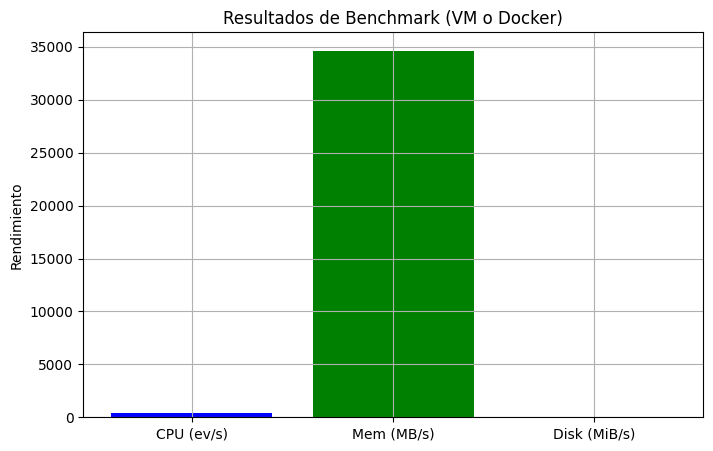

In [17]:
labels = ['CPU (ev/s)', 'Mem (MB/s)', 'Disk (MiB/s)']
valores = [cpu_valor, mem_valor, disk_valor]

plt.figure(figsize=(8, 5))
plt.bar(labels, valores, color=['blue', 'green', 'orange'])
plt.title("Resultados de Benchmark (VM o Docker)")
plt.ylabel("Rendimiento")
plt.grid(True)
plt.show()

